In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ggplot import *
from scipy.stats import ttest_ind
from calendar import month_name

In [222]:
df = pd.read_csv('BOS_CUN_trips1M.csv')

In [223]:
# change types to datetimes
df.departure_odate = pd.to_datetime(df.departure_odate)
df.return_ddate = pd.to_datetime(df.return_ddate)
df.receiveddate = pd.to_datetime(df.receiveddate)

# When should I go?

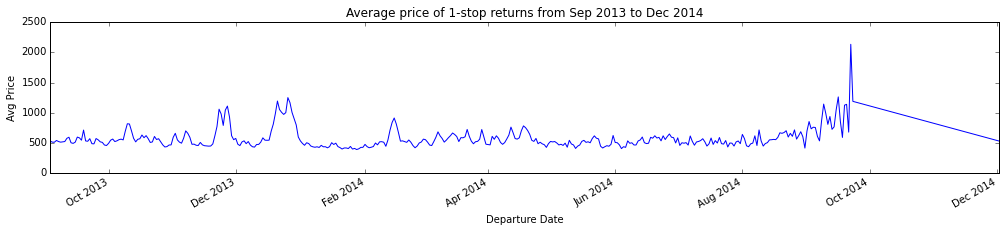

In [224]:
ax = df[(df.outboundstops == 1) & (df.returnstops == 1)].pivot_table(index='departure_odate', values='total').plot(y='average price', figsize=(17, 3))
ax.set_xlabel('Departure Date')
ax.set_ylabel("Avg Price")
ax.set_title('Average price of 1-stop returns from Sep 2013 to Dec 2014')

In [225]:
byDeparture = df[(df.cabinclass == 'E')][['departure_odate', 'total']].groupby('departure_odate').mean()

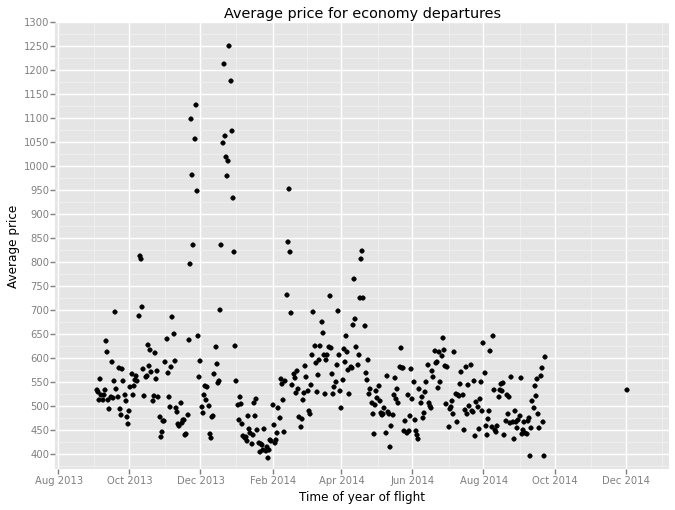

<ggplot: (398247897)>

In [226]:
ggplot(byDeparture, aes(pd.to_datetime(byDeparture.index, unit='s'), y='total')) + \
    geom_point() + \
    ggtitle('Average price for economy departures') + \
    labs(x='Time of year of flight', y='Average price') + ylim(370, 1300)

## Don't travel over thanksgiving or New Years!

The plot above clearly shows that prices are expensive around the thanksgiving holiday and from the middle of december until new years. October looks good, thought we only have 1 year of data.

In [227]:
# sort months by price
byDepart = df
byDepart.index = df.departure_odate
byDepartByMon = byDepart.resample('M')
byDepartByMon.index = byDepartByMon.index.map(lambda x: month_name[x.month])

In [228]:
iso_mon = byDepartByMon.pivot_table(index=byDepartByMon.index, values='total').sort_values()
iso_mon

January      469.259203
May          523.976119
July         526.877762
June         553.309100
August       590.065200
October      598.114531
March        614.535064
September    661.347428
February     678.838327
April        690.940187
December     702.786052
November     726.643247
Name: total, dtype: float64

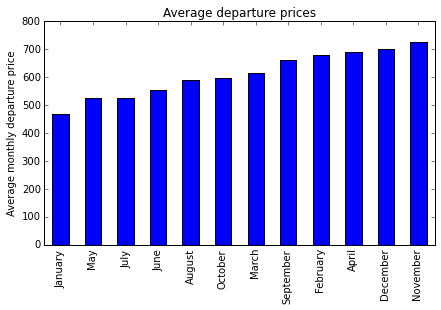

In [229]:
pl = iso_mon.plot(kind='bar', figsize=(7, 4))
pl.set_ylabel('Average monthly departure price')
pl.set_title('Average departure prices')

## Travel after New Year's in January!

From the bar plot above, we can see that the cheapest month to fly in is January, though that is after the new year's holiday. It's likely also possible to squeeze in some short trips within an otherwise expensive month, since these are averages taken at the month level.  

# Does number of stops make a difference?

In [230]:
one_stop = df[(df.outboundstops == 1) & (df.returnstops == 1)]
print 'Average price of trips with one stop flights in both directions: $', np.round(np.mean(one_stop.total))
at_least_one_direct = df[(df.outboundstops < 1) | (df.returnstops < 1)]
print 'Average price of trips with at least one direct flight: $', np.round(np.mean(at_least_one_direct.total))
print "Average price increase for a trip with a direct flight: $", np.round(np.mean(at_least_one_direct.total) - np.mean(one_stop.total))

Average price of trips with one stop flights in both directions: $ 651.0
Average price of trips with at least one direct flight: $ 848.0
Average price increase for a trip with a direct flight: $ 196.0


### Though the percentage of trips featuring a direct flight is substrantially less (13% of all trips), if you have the happy chance to find one of these you will pay substantially more to fly direct.

In [231]:
print "Percentage of trips with 1 stop in both directions: ", np.round(float(len(one_stop)) / len(df) * 100), "%"
print "Percentage of trips with at least 1 direct flight: ", np.round(float(len(at_least_one_direct)) / len(df) * 100), "%"

Percentage of trips with 1 stop in both directions:  76.0 %
Percentage of trips with at least 1 direct flight:  13.0 %


### Confidence in this difference in price

In [232]:
print "The variances of the two groups are approximately equal (an assumption of the t-test) : FALSE" 
print "Variance of trips with 1 stop each way, ", np.var(one_stop.total)
print "Variance of at least one direct flight, ", np.var(at_least_one_direct.total)
print "Therefore, we can use Welch's T-test:"

The variances of the two groups are approximately equal (an assumption of the t-test) : FALSE
Variance of trips with 1 stop each way,  69727.1932596
Variance of at least one direct flight,  115067.857988
Therefore, we can use Welch's T-test:


In [233]:
test_result = ttest_ind(one_stop.total, at_least_one_direct.total, equal_var=False)
print "We are confident that the difference is real, with p value ~ ", test_result.pvalue

We are confident that the difference is real, with p value ~  0.0


In [234]:
ts = one_stop
ts = ts.set_index('departure_odate')
ts.head()

,messageid,tripindex,received,currency,total,tax,surcharge,source,merchant,majorcarrierid,...,paxtype,refundable,triptimestamp,receiveddate,received_odate,return_ddate,los2,departure_dow,return_dow,includes_sns
departure_odate,,,,,,,,,,,,,,,,,,,,,
2014-03-14,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,12,1382317607,USD,631.45,123.45,0,Sabre,TCY,US,...,ADT,False,1382317607,1970-01-01 00:00:00.020131021,2013-10-20,2014-03-22,8,5,6,1
2014-03-14,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,11,1382317607,USD,632.95,124.95,0,Sabre,TCY,US,...,ADT,False,1382317607,1970-01-01 00:00:00.020131021,2013-10-20,2014-03-22,8,5,6,1
2014-03-14,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,10,1382317607,USD,620.95,124.95,0,Sabre,TCY,B6,...,ADT,False,1382317607,1970-01-01 00:00:00.020131021,2013-10-20,2014-03-22,8,5,6,1
2014-03-14,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,9,1382317607,USD,632.95,124.95,0,Sabre,TCY,US,...,ADT,False,1382317607,1970-01-01 00:00:00.020131021,2013-10-20,2014-03-22,8,5,6,1
2014-03-14,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,8,1382317607,USD,565.95,124.95,0,Sabre,TCY,US,...,ADT,False,1382317607,1970-01-01 00:00:00.020131021,2013-10-20,2014-03-22,8,5,6,1


## What price should I expect to pay?

In [235]:
print "The average price for this trip is $", np.round(np.mean(ts.total))
print "But you can see from the below plot that there are a lot of trips selling for substantially less."
print "Around the $500 mark would be a good price, though deals can be had for less than that."
print "Approximately a quarter of flights sell for between $400 and $550: ", np.round(float(len(ts[(ts.total < 500) & (ts.total > 400)])) / len(ts) * 100), "%"

The average price for this trip is $ 651.0
But you can see from the below plot that there are a lot of trips selling for substantially less.
Around the $500 mark would be a good price, though deals can be had for less than that.
Approximately a quarter of flights sell for between $400 and $550:  26.0 %


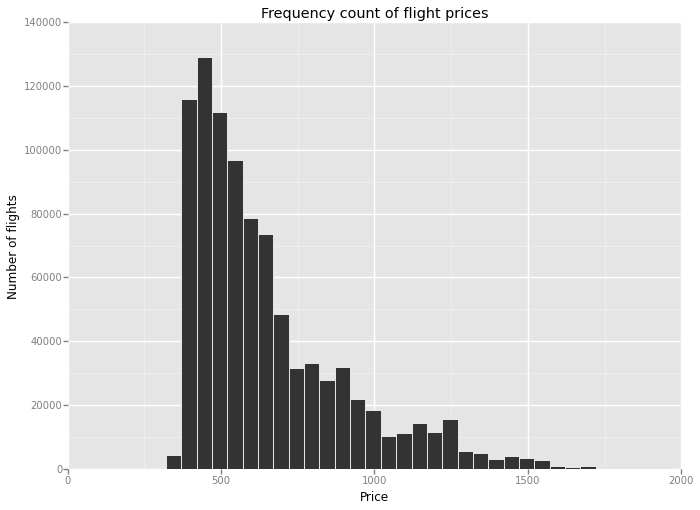

<ggplot: (394070177)>

In [236]:
fig = ggplot(aes(x='total'), data=ts) + geom_histogram(binwidth=50) + xlim(0, 2000) + ggtitle("Frequency count of flight prices") + xlab("Price") + ylab("Number of flights")
fig

In [237]:
#plt = ts.hist(column='total', bins=19, xlabelsize=10, range=(200, 1000), ax=None)

## How far in advance should I book?

In [238]:
df[['departure', 'los2', 'triptimestamp']].head()

,departure,los2,triptimestamp
departure_odate,,,
2014-03-14,1394789400,8,1382317607
2014-03-14,1394829000,8,1382317607
2014-03-14,1394804580,8,1382317607
2014-03-14,1394789400,8,1382317607
2014-03-14,1394789400,8,1382317607


In [239]:
# get the difference in time between the query and the trip
df['queryToDepartInDays'] = pd.to_datetime(df.departure, unit='s') - pd.to_datetime(df.triptimestamp, unit='s')
# translate it into number of days
df['queryToDepartInDays'] = df.queryToDepartInDays.astype('timedelta64[D]')

In [240]:
df.queryToDepartInDays.describe()

count    1202445.000000
mean         100.421106
std           67.016682
min            0.000000
25%           49.000000
50%           87.000000
75%          145.000000
max          411.000000
Name: queryToDepartInDays, dtype: float64

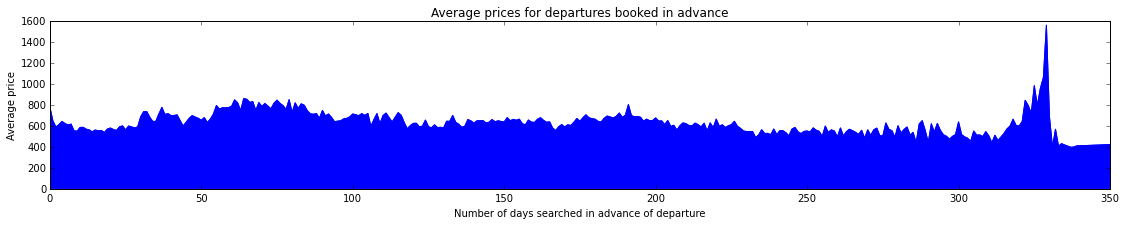

In [241]:
fig = df.pivot_table(index='queryToDepartInDays', values='total').plot(kind='area', figsize=(19, 3), xlim=(0, 350))
fig.set_xlabel('Number of days searched in advance of departure')
fig.set_ylabel('Average price')
fig.set_title('Average prices for departures booked in advance')
df.plot?

In [242]:
# average price for economy class fairs booked x days in advance
byDays = df[df.cabinclass == 'E'][['queryToDepartInDays', 'total']].groupby('queryToDepartInDays').mean()
byDays.head()

,total
queryToDepartInDays,
0,783.596949
1,650.641039
2,590.039367
3,613.344953
4,643.926756


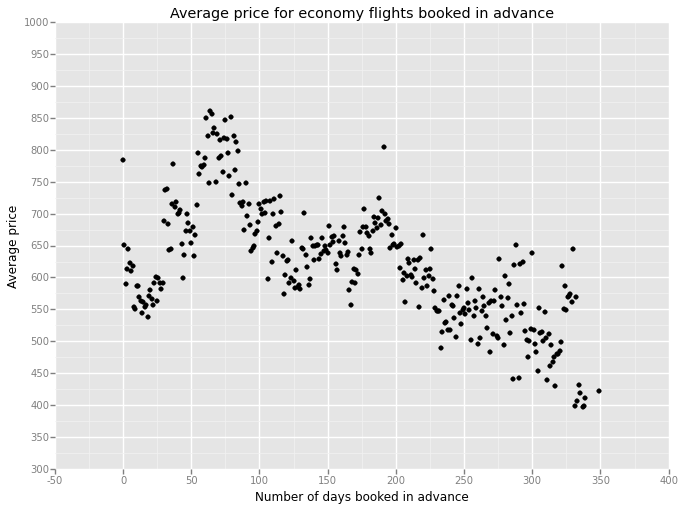

<ggplot: (316989165)>

In [243]:
ggplot(byDays, aes(byDays.index, y='total')) + \
    geom_point() + \
    ggtitle('Average price for economy flights booked in advance') + \
    labs(x='Number of days booked in advance', y='Average price') + xlim(-50,400) + ylim(300, 1000)

What can we say about booking in advance? There definetly seems to be a downward trend, i.e. the longer you wait, the better the price, but I don't think that's the whole story. This graph doesn't take into account how quickly prices change for specific times of year. We would want to see this graph repeated a few different times for specific times of the year, i.e. how long you wait might be different if trying to by around a holiday, or tourist season. It also doesn't take into account length of actual trip (signifigant?) or number of stops. 

If relying on this graph alone, we might say something like: the only time flights can be purchased at prices $500 and under (which are good prices for this ticket) on average is when they are purchased between 225 and 1 year in advance, which is probably not possible for most vacation planners. According to the graph, there are seems to be some weird expensive sweet spot when tickets are bought between 60 and 70 days in advance -- maybe that's when demand is highest.

In [244]:
bt50and100days = df[(df.queryToDepartInDays > 50) & (df.queryToDepartInDays < 100)]
print 'mean and variance for ticket bought between 50 and 100 days in advance'
print 'mean: $', np.round(np.mean(bt50and100days.total))
print 'variance on same restriction', np.round(np.var(bt50and100days.total))

mean and variance for ticket bought between 50 and 100 days in advance
mean: $ 763.0
variance on same restriction 114464.0


In [245]:
print 'mean and variance for ticket bought between 0 and 50 days in advance'
print 'mean $', np.round(np.mean(df[(df.queryToDepartInDays > 0) & (df.queryToDepartInDays < 50)].total))
print 'variance', np.round(np.var(df[(df.queryToDepartInDays > 0) & (df.queryToDepartInDays < 50)].total))

mean and variance for ticket bought between 0 and 50 days in advance
mean $ 630.0
variance 57482.0


In [246]:
bt200and300days = df[(df.queryToDepartInDays >= 200) & (df.queryToDepartInDays <= 300)]
print 'mean and variance for ticket bought between 200 and 300 days in advance'
print 'mean: $', np.round(np.mean(bt200and300days.total))
print 'variance on same restriction', np.round(np.var(bt200and300days.total))

mean and variance for ticket bought between 200 and 300 days in advance
mean: $ 586.0
variance on same restriction 26977.0


## There is definetly an advantage to buying way in advance, i.e. greater than 200 days in advance, but also potentially a nice window less than 50 days out where you can snag a deal.